In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import torch
from src.d05_multiclass_model import Trainer

torch.use_deterministic_algorithms(True) 


W0929 14:33:48.896000 113048 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


In [2]:
trainer = Trainer('cuda', tracking=True, experiment='Assembly Inspector Counter Classifier')

In [ ]:
#model = trainer.train_model(folder='./data/temp/counting_imgs/screwdriver/scale_0.35', part='screwdriver', num_in_assembly=1)

In [3]:
model = trainer.train_model(folder='./data/temp/counting_imgs/wheels_five/scale_0.2', part='screw', num_in_assembly=5)

Training...


RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'

In [6]:
import torch
tensor = torch.tensor([[1.4769]])
tensor.view(-1)

tensor([1.4769])

In [5]:
dls = trainer.get_dataloaders('./data/temp/counting_imgs/screwdriver/scale_0.35/screwdriver', [1, 672, 378], 1)

In [20]:
preds = []
ys =[]
model.eval()
with torch.no_grad():
    for X, y in dls["assembly"]:
        ys.append(y)
        X = X.to('cuda')
        pred = model(X).squeeze()
        preds.append(pred)

In [ ]:
preds_lst = []
for pred in preds:
    preds_lst+=(preds[0].tolist())


In [27]:
dls["assembly"].dataset.dataset[0][1] = 32
dls["assembly"].dataset.dataset[0][1]

TypeError: 'tuple' object does not support item assignment

(array([ 98.,  98.,  98.,   0.,   0.,   0.,  98.,   0., 392., 784.]),
 array([2.23133588, 2.30396211, 2.37658834, 2.44921458, 2.52184081,
        2.59446704, 2.66709328, 2.73971951, 2.81234574, 2.88497198,
        2.95759821]),
 <BarContainer object of 10 artists>)

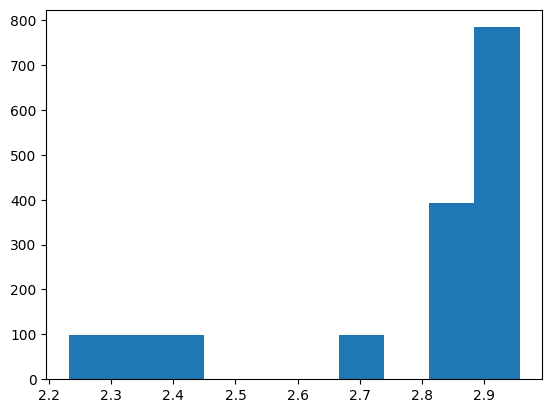

In [19]:
import matplotlib.pyplot as plt

plt.hist(preds_lst)